# GEONE - Images interpolation

This notebook introduces some tools to interpolate an image (class `geone.img.Img`).

## Import what is required

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# import package 'geone'
import geone as gn

In [2]:
# Show version of python and version of geone
import sys 
print(sys.version_info)
print('geone version: ' + gn.__version__)

sys.version_info(major=3, minor=11, micro=5, releaselevel='final', serial=0)
geone version: 1.2.4


### Remark
The matplotlib figures can be visualized in *interactive* mode:
- `%matplotlib notebook`: enable interactive mode
- `%matplotlib inline`: disable interactive mode

## Interpolate an image
The function `geone.img.interpolateImage` interpolates (each variable of) an image on a given grid, and returns
the result on an output image. This allows for example to make an image finer or coarser. Both categorical and continuous variables are handled. See the example below.

In [3]:
# Read a bivariate 2D image:
# - variable of index 0: categorical
# - variable of index 1: continuous
data_dir = 'data'
filename = os.path.join(data_dir, 'ti_2var.txt')
im = gn.img.readImageTxt(filename)

# Set some undefined value (np.nan)
im.val[0, ((im.xx()-20)/10)**2 + ((im.yy()-100)/50)**2 < 1] = np.nan
im.val[1, ((im.xx()-40)/20)**2 + ((im.yy()-90)/30)**2 < 1] = np.nan

In [4]:
# Refine image
nx_new = 2*im.nx
ny_new = 2*im.ny
im_new = gn.img.interpolateImage(im, nx=nx_new, ny=ny_new, categVar=[True, False])

# Make the image coarser
nx_new_2 = int(im.nx/3)
ny_new_2 = int(im.ny/3)
im_new_2 = gn.img.interpolateImage(im, nx=nx_new_2, ny=ny_new_2, categVar=[True, False])

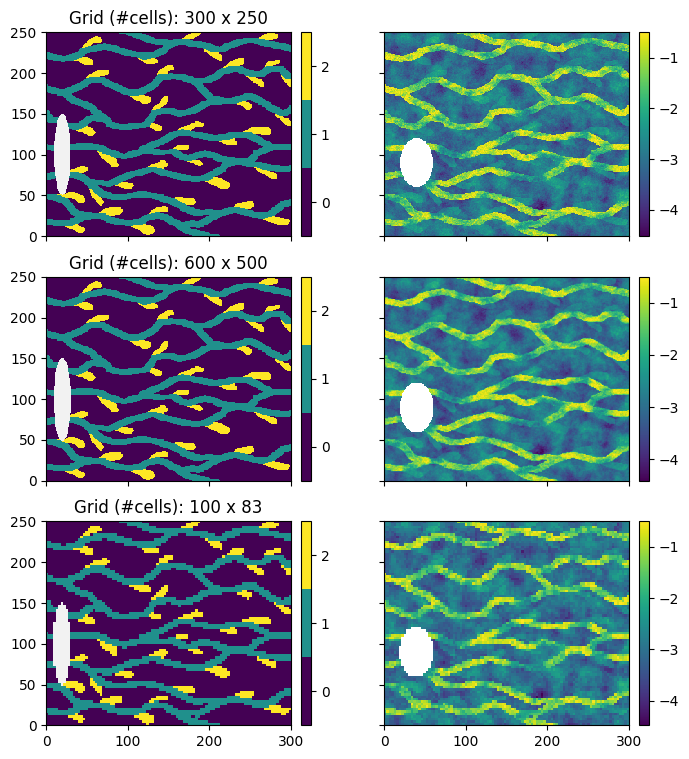

In [5]:
plt.subplots(3, 2, sharex=True, sharey=True, figsize=(8,9))

plt.subplot(3, 2, 1)
gn.imgplot.drawImage2D(im, iv=0, categ=True)
plt.title(f'Grid (#cells): {im.nx} x {im.ny}')

plt.subplot(3, 2, 2)
gn.imgplot.drawImage2D(im, iv=1, categ=False)

plt.subplot(3, 2, 3)
gn.imgplot.drawImage2D(im_new, iv=0, categ=True)
plt.title(f'Grid (#cells): {im_new.nx} x {im_new.ny}')

plt.subplot(3, 2, 4)
gn.imgplot.drawImage2D(im_new, iv=1, categ=False)

plt.subplot(3, 2, 5)
gn.imgplot.drawImage2D(im_new_2, iv=0, categ=True)
plt.title(f'Grid (#cells): {im_new_2.nx} x {im_new_2.ny}')

plt.subplot(3, 2, 6)
gn.imgplot.drawImage2D(im_new_2, iv=1, categ=False)

plt.show()

## Interpolator (function) from an image
The class `Img_interp_func` defines an interpolator from one variable defined in an image.
See the doc for more details.

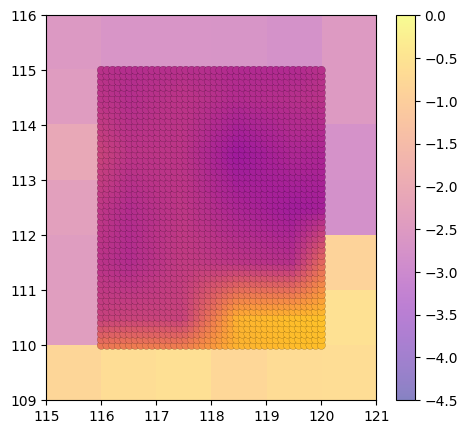

In [6]:
# Get interpolator function from the variable of index 1 of the image im within the slice iz=0
interp = gn.img.Img_interp_func(im, ind=1, iz=0)

# Set some points within the grid
xmin, xmax = 116, 120
ymin, ymax = 110, 115
mx, my = 40, 50
x = np.linspace(xmin, xmax, mx)
y = np.linspace(ymin, ymax, my)
yy, xx = np.meshgrid(y, x, indexing='ij')
points = np.array((xx.reshape(-1), yy.reshape(-1))).T

# Get the values via the interpolator
v = interp(points)

# Plot underlying image (from which the interpolator is defined) and the points
cmap='plasma'
vmin, vmax = -4.5, 0.

plt.figure(figsize=(8,5))
gn.imgplot.drawImage2D(im, iv=1, categ=False, cmap=cmap, vmin=vmin, vmax=vmax, alpha=.5)
plot = plt.scatter(points[:,0], points[:,1], c=v, cmap=cmap, vmin=vmin, vmax=vmax,
                   edgecolors='black', linewidths=.1)
plt.xlim(xmin-1, xmax+1)
plt.ylim(ymin-1, ymax+1)
plt.show()